In [21]:
import xarray as xr

In [24]:
ds=xr.open_dataset('data.nc').sel(expver=1)

<h3> trade-of dimensions</h3><br>
<p>i.e latitude ,longitude and time</p><br>

<h3>SKT(skin Tempreature)(unit k)</h3><br>
<p>Temperature of the surface of the Earth. The skin temperature is the theoretical temperature that is required to satisfy the surface energy balance. It represents the temperature of the uppermost surface layer, which has no heat capacity and so can respond instantaneously to changes in surface fluxes. Skin temperature is calculated differently over land and sea. Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.</p>


<h3>TTP(Total precipitation) unit-(m)</h3><br>
<p>Accumulated liquid and frozen water, including rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation (that precipitation which is generated by large-scale weather patterns, such as troughs and cold fronts) and convective precipitation (generated by convection which occurs when air at lower levels in the atmosphere is warmer and less dense than the air above, so it rises). Precipitation variables do not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This variable is accumulated from the beginning of the forecast time to the end of the forecast step. The units of precipitation are depth in metres. It is the depth the water would have if it were spread evenly over the grid box. Care should be taken when comparing model variables with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box and model time step.</p>


<h3>LHV(Leaf area index, high vegetation) unit-(m^2 m^-2)</h3><br>
<p>Accumulated liquid and frozen water, including rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation (that precipitation which is generated by large-scale weather patterns, such as troughs and cold fronts) and convective precipitation (generated by convection which occurs when air at lower levels in the atmosphere is warmer and less dense than the air above, so it rises). Precipitation variables do not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This variable is accumulated from the beginning of the forecast time to the end of the forecast step. The units of precipitation are depth in metres. It is the depth the water would have if it were spread evenly over the grid box. Care should be taken when comparing model variables with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box and model time step.</p>

<h3> X-ARRAY</h3><br>
<p>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.</p><br>


In [25]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [26]:
ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (latitude: 89, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude) float32 ...
    skt        (time, latitude) float32 ...
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [27]:
ds.sel(longitude=-82,latitude=5.75,time='2018-01-01')

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
    expver     int32 1
    time       datetime64[ns] 2018-01-01
Data variables:
    lai_hv     float32 ...
    skt        float32 ...
    tp         float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [28]:
 ds.sel(latitude=99,method='nearest') #find nearest value if 99 deg does not exist

<xarray.Dataset>
Dimensions:    (longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
    latitude   float32 6.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, longitude) float32 ...
    skt        (time, longitude) float32 ...
    tp         (time, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.844  , 271.1717 , 275.49936, 279.82706, 284.15472, 288.48242,
        292.81012, 297.1378 , 301.46548, 305.79315, 310.12085],
       dtype=float32),
 <a list of 10 Patch objects>)

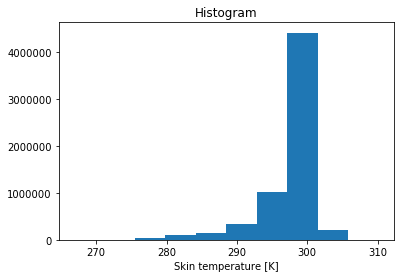

In [29]:
ds.skt.plot()

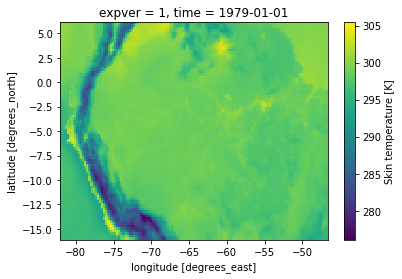

In [32]:
ds.skt.isel(time=0).plot()

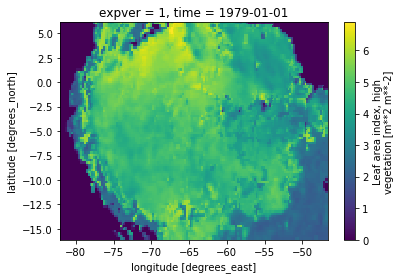

In [31]:
ds.isel(time=0).lai_hv.plot()

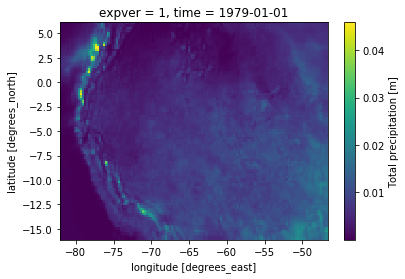

In [35]:
ds.isel(time=0).tp.plot()

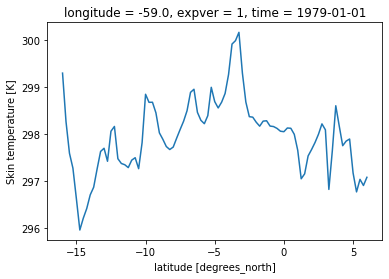

In [36]:
ds.isel(time=0).sel(longitude=-59,method='nearest').skt.plot()

In [38]:
temp_change=(ds.skt.sel(time='2019-01-01') -ds.skt.sel(time='1979-01-01') )
temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

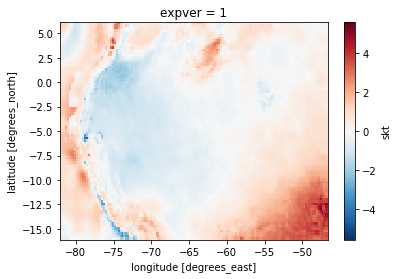

In [39]:
temp_change.plot()

In [42]:
seasonal_change=(ds.lai_hv.sel(time='2019-07-01')-ds.lai_hv.sel(time='2019-01-01'))
seasonal_change


<xarray.DataArray 'lai_hv' (latitude: 89, longitude: 142)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.54425895,
        -0.6124805 , -0.5182029 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.60069585,
        -0.61853516, -0.5242573 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.59831727,
        -0.5672877 , -0.53366363]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

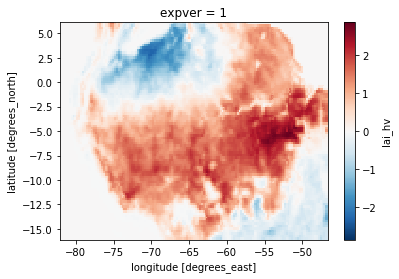

In [43]:
 seasonal_change.plot()

In [44]:
mean_temp=ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

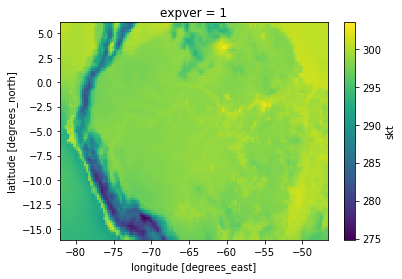

In [45]:
mean_temp.plot()

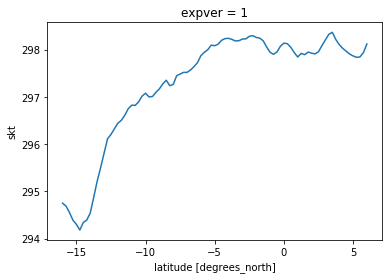

In [46]:
#temp decreses when you south and is high near equator
ds.skt.mean(dim=['time','longitude']).plot()

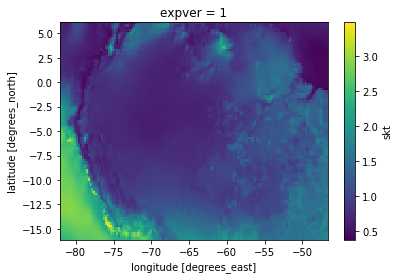

In [47]:
#more deviation or change in temp across pacific ocean rather than the amazon forest
ds.skt.std(dim='time').plot()

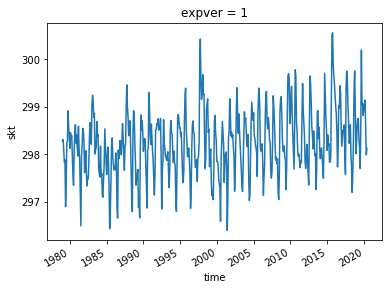

In [48]:
ds.skt.median(dim=['latitude','longitude']).plot()

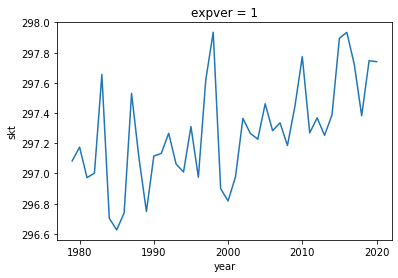

In [51]:
(ds.groupby(ds.time.dt.year).mean(dim=['time','latitude','longitude']).skt.plot())

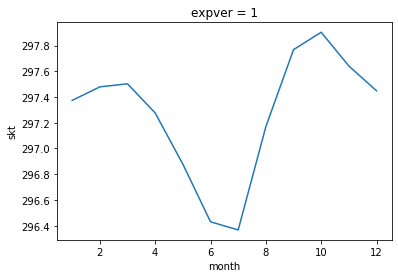

In [52]:
(ds.groupby(ds.time.dt.month).mean(dim=['time','latitude','longitude']).skt.plot())

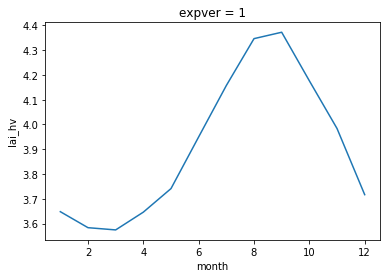

In [53]:
 (ds.groupby(ds.time.dt.month).mean(dim=['time','latitude','longitude']).lai_hv.plot())

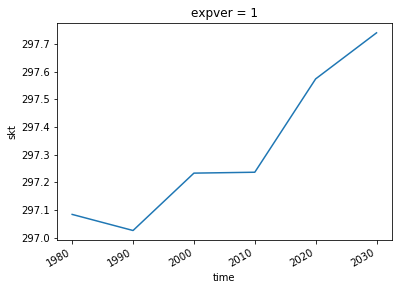

In [54]:
(ds.resample({'time':'10y'}).mean(dim=['time','latitude','longitude']).skt.plot())